<a href="https://colab.research.google.com/github/Charanjeev-2k2/COVID-19-Data-Analysis/blob/main/COVID_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import io
print('Modules are imported.')

Modules are imported.


Import COVID 19 Dataset

In [ ]:
#Import COVID 19 Dataset
from google.colab import files
uploaded = files.upload()

Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global.csv


In [ ]:
corona_dataset = pd.read_csv(io.BytesIO(uploaded['time_series_covid19_confirmed_global.csv'])) 
corona_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063


In [ ]:
#Check Shape
corona_dataset.shape

(274, 436)

In [ ]:
#Delete useless columns
corona_dataset.drop(['Lat','Long'],axis=1,inplace=True)
#Aggregate rows by country
corona_dataset_aggregated = corona_dataset.groupby("Country/Region").sum()
corona_dataset_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,525,548,548,598,598,614,636,646,701,701,726,730,769,769,769,813,813,813,848,848,862,882,882,945,962,963,963,992,992,1008,1011,1033,1033,1072,1080,1080,1103,1122,1122,1128
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2039124,2046795,2054681,2060625,2064334,2069751,2077228,2085411,2093645,2098728,2104197,2107365,2112023,2118676,2126531,2133963,2141854,2146714,2149636,2154694,2162001,2169694,2177898,2185747,2192025,2195722,2201886,2210121,2218425,2226753,2234913,2241739,2245771,2252172,2261577,2269877,2278115,2291051,2301389,2308597
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,169597,169820,170011,170234,170402,170506,170672,170945,171227,171510,171793,172058,172216,172456,172816,173307,173749,174257,174679,175016,175198,175538,176286,177104,177899,178385,178702,179287,180141,181165,182056,183127,183713,184219,185020,186184,187441,188446,189540,190317
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,28912,28918,28920,28926,28930,28937,28939,28947,28957,28965,28970,28978,28986,28996,29007,29021,29029,29034,29046,29061,29074,29090,29102,29112,29117,29130,29137,29154,29166,29183,29192,29196,29206,29211,29221,29230,29239,29252,29259,29276


In [ ]:
corona_dataset_aggregated.shape

(192, 432)

Visualizing data related to a country

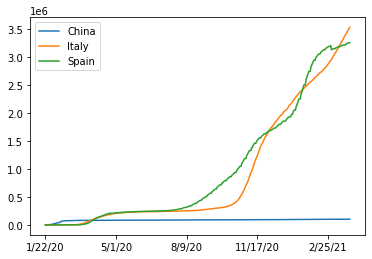

In [ ]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

Calculating a good measure

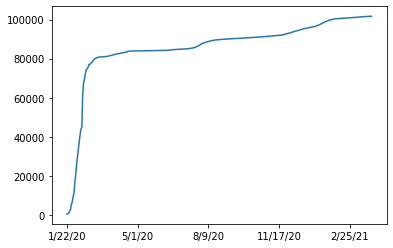

In [ ]:
corona_dataset_aggregated.loc['China'].plot()

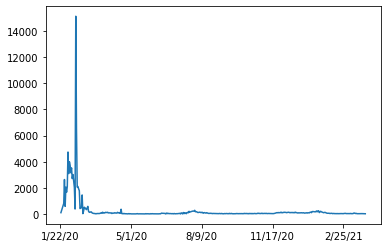

In [ ]:
#Calculating first derivative of curve
corona_dataset_aggregated.loc['China'].diff().plot()

In [ ]:
print(corona_dataset_aggregated.loc['China'].diff().max())
print(corona_dataset_aggregated.loc['Italy'].diff().max())
print(corona_dataset_aggregated.loc['Spain'].diff().max())

15136.0
40902.0
93822.0


Finding max infection rate for each country

In [ ]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated['max infection rate'] = max_infection_rates
corona_dataset_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,1485.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,1239.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,299.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,355.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,548,598,598,614,636,646,701,701,726,730,769,769,769,813,813,813,848,848,862,882,882,945,962,963,963,992,992,1008,1011,1033,1033,1072,1080,1080,1103,1122,1122,1128,82.0
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2046795,2054681,2060625,2064334,2069751,2077228,2085411,2093645,2098728,2104197,2107365,2112023,2118676,2126531,2133963,2141854,2146714,2149636,2154694,2162001,2169694,2177898,2185747,2192025,2195722,2201886,2210121,2218425,2226753,2234913,2241739,2245771,2252172,2261577,2269877,2278115,2291051,2301389,2308597,18326.0
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,169820,170011,170234,170402,170506,170672,170945,171227,171510,171793,172058,172216,172456,172816,173307,173749,174257,174679,175016,175198,175538,176286,177104,177899,178385,178702,179287,180141,181165,182056,183127,183713,184219,185020,186184,187441,188446,189540,190317,2476.0
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,28918,28920,28926,28930,28937,28939,28947,28957,28965,28970,28978,28986,28996,29007,29021,29029,29034,29046,29061,29074,29090,29102,29112,29117,29130,29137,29154,29166,29183,29192,29196,29206,29211,29221,29230,29239,29252,29259,29276,716.0


In [ ]:
#Selecting the useful column
corona_data = pd.DataFrame(corona_dataset_aggregated['max infection rate'])
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [ ]:
#IMPORTING SECOND DATASET
from google.colab import files
uploaded = files.upload()


Saving WHR20_DataForFigure2.1.csv to WHR20_DataForFigure2.1 (3).csv


In [ ]:
happiness_data = pd.read_csv(io.BytesIO(uploaded['WHR20_DataForFigure2.1.csv'])) 
happiness_data.head(10)

,Country name,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750
5,Netherlands,7.4489,10.812712,0.939139,72.300919,0.908548
6,Sweden,7.3535,10.758794,0.926311,72.600769,0.939144
7,New Zealand,7.2996,10.500943,0.949119,73.202629,0.936217
8,Austria,7.2942,10.742824,0.928046,73.002502,0.899989
9,Luxembourg,7.2375,11.450681,0.906912,72.599998,0.905636


In [ ]:
happiness_data.shape

(153, 6)

In [ ]:
#Setting Indices
happiness_data.set_index(['Country name'],inplace=True)
happiness_data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,,
Finland,7.8087,10.639267,0.954330,71.900825,0.949172
Denmark,7.6456,10.774001,0.955991,72.402504,0.951444
Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337
Iceland,7.5045,10.772559,0.974670,73.000000,0.948892
Norway,7.4880,11.087804,0.952487,73.200783,0.955750


Joining the datasets

In [ ]:
#corona dataset
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [ ]:
#world happiness report dataset
happiness_data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,,
Finland,7.8087,10.639267,0.954330,71.900825,0.949172
Denmark,7.6456,10.774001,0.955991,72.402504,0.951444
Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337
Iceland,7.5045,10.772559,0.974670,73.000000,0.948892
Norway,7.4880,11.087804,0.952487,73.200783,0.955750


In [ ]:
data = happiness_data.join(corona_data).copy()
data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Country name,,,,,,
Finland,7.8087,10.639267,0.954330,71.900825,0.949172,863.0
Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,4508.0
Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,21926.0
Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,106.0
Norway,7.4880,11.087804,0.952487,73.200783,0.955750,1680.0


In [ ]:
#Correlation matrix representing the correlation between every two columns of the dataset
data.corr() 

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Score,1.000000,0.775374,0.765001,0.770316,0.590597,0.034717
GDP per capita,0.775374,1.000000,0.781814,0.848469,0.419019,0.131309
Social support,0.765001,0.781814,1.000000,0.742744,0.478863,0.065853
Healthy life expectancy,0.770316,0.848469,0.742744,1.000000,0.448846,0.103965
Freedom to make life choices,0.590597,0.419019,0.478863,0.448846,1.000000,-0.093217
max infection rate,0.034717,0.131309,0.065853,0.103965,-0.093217,1.000000


Visualization of results

In [ ]:
data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Country name,,,,,,
Finland,7.8087,10.639267,0.954330,71.900825,0.949172,863.0
Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,4508.0
Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,21926.0
Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,106.0
Norway,7.4880,11.087804,0.952487,73.200783,0.955750,1680.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


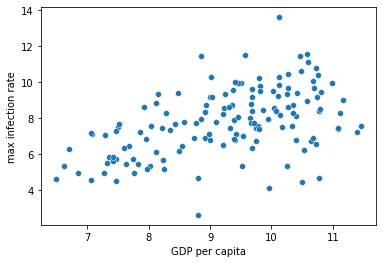

In [ ]:
#Plotting GDP vs max infection rate
x = data['GDP per capita']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


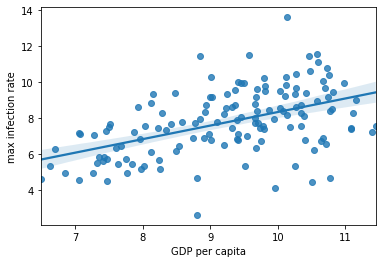

In [ ]:
# regplot is a better approach
sns.regplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


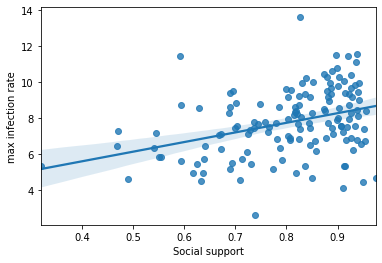

In [ ]:
#social support vs max infection rate
x = data['Social support']
y = data['max infection rate']
sns.regplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


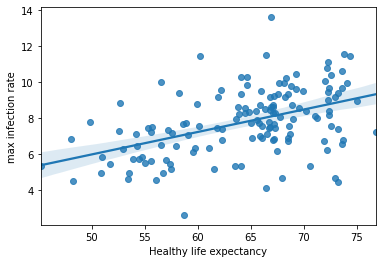

In [ ]:
#Healthy life expectancy vs max infection rate
x = data['Healthy life expectancy']
y = data['max infection rate']
sns.regplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


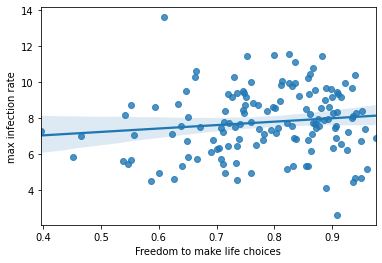

In [ ]:
#Freedom to make life choices vs max infection rate
x = data['Freedom to make life choices']
y = data['max infection rate']
sns.regplot(x,np.log(y))

*Referenced from a Coursera Guided Project*